In [22]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Libraries-Import

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import joblib

Dataloading-Preprocessing

In [44]:
# 1. Load Dataset
df = pd.read_csv(".\symptoms_disease.csv")  
# 2. Combine and encode symptoms (multi-hot)
symptom_cols = ['Symptom 1', 'Symptom 2', 'Symptom 3']
all_symptoms = sorted(set(symptom for symptom in df[symptom_cols].values.ravel() if isinstance(symptom, str)))
print(all_symptoms)
# Multi-hot encode each row
def encode_row(row):
    symptoms = [row[col] for col in symptom_cols]
    return [1 if symptom in symptoms else 0 for symptom in all_symptoms]

df['features'] = df.apply(encode_row, axis=1)

# Expand list into multiple columns
X = pd.DataFrame(df['features'].to_list(), columns=all_symptoms)

# 3. Encode disease labels
le = LabelEncoder()
y = le.fit_transform(df['Disease']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

['Abdominal cramps', 'Abdominal pain', 'Abdominal swelling', 'Abnormal heart rhythm', 'Acne', 'Anxiety', 'Appetite loss', 'Back pain', 'Belly pain', 'Blackheads', 'Bladder discomfort', 'Bleeding gums', 'Bloating', 'Blurred vision', 'Body aches', 'Burning urination', 'Butterfly rash', 'Chest pain', 'Chest tightness', 'Cold intolerance', 'Confusion', 'Constipation', 'Cough', 'Dark urine', 'Dehydration', 'Depression', 'Diarrhea', 'Difficulty breathing', 'Difficulty swallowing', 'Dizziness', 'Dry mouth', 'Dry skin', 'Ear pain', 'Excessive hunger', 'Excessive sweating', 'Fainting', 'Fast heart rate', 'Fatigue', 'Fever', 'Foul smell of urine', 'Frequent urination', 'Hair loss', 'Headache', 'High fever', 'Hoarseness', 'Increased thirst', 'Irritability', 'Itching', 'Itchy eyes', 'Jaundice', 'Joint pain', 'Joint stiffness', 'Knee pain', 'Leg pain', 'Loss of appetite', 'Loss of consciousness', 'Lower abdominal pain', 'Morning pain', 'Muscle pain', 'Muscle weakness', 'Nausea', 'Neck swelling', 'N

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sondh\AppData\Local\Temp\ipykernel_5628\771535524.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(".\symptoms_disease.csv")


Decision-Tree

In [ ]:
# === Decision Tree ===
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\n=== Decision Tree ===")
dt_ans=mode(dt_pred, axis=0)[0].flatten()[0] 
print("Accuracy: ", accuracy_score(dt_pred, y_test) * 100, "%")
print("Precision      :", precision_score(y_test, dt_pred, average='weighted') * 100, "%")
print("Recall         :", recall_score(y_test, dt_pred, average='weighted') * 100, "%")
print("F1 Score       :", f1_score(y_test, dt_pred, average='weighted') * 100, "%")



=== Decision Tree ===
Accuracy:  59.241706161137444 %
Precision      : 63.94252272214357 %
Recall         : 59.241706161137444 %
F1 Score       : 58.50829337997915 %


C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

In [46]:

# === Random Forest ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\n=== Random Forest ===")
rf_ans=mode(rf_pred, axis=0)[0].flatten()[0] 
print("Accuracy: ", accuracy_score(rf_pred, y_test) * 100, " %")
print("Precision      :", precision_score(y_test, rf_pred, average='weighted') * 100, "%")
print("Recall         :", recall_score(y_test, rf_pred, average='weighted') * 100, "%")
print("F1 Score       :", f1_score(y_test, rf_pred, average='weighted') * 100, "%")


=== Random Forest ===
Accuracy:  64.45497630331754  %
Precision      : 65.0925077772025 %
Recall         : 64.45497630331754 %
F1 Score       : 63.41358413018069 %


C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes

In [47]:
# === Naive Bayes ===
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\n=== Naive Bayes ===")
nb_ans=mode(nb_pred, axis=0)[0].flatten()[0] 
print("Accuracy: ", accuracy_score(nb_pred, y_test) * 100, " %")
print("Precision      :", precision_score(y_test, nb_pred, average='weighted') * 100, "%")
print("Recall         :", recall_score(y_test, nb_pred, average='weighted') * 100, "%")
print("F1 Score       :", f1_score(y_test, nb_pred, average='weighted') * 100, "%")



=== Naive Bayes ===
Accuracy:  61.61137440758294  %
Precision      : 57.03876505136171 %
Recall         : 61.61137440758294 %
F1 Score       : 58.35266664348927 %


C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Majority

In [48]:
# === Majority ===
final_predictions = np.array([rf_pred, nb_pred, dt_pred])
final_majority_vote = mode(final_predictions, axis=0)[0].flatten() 
print("\n=== Mode ===")
print("Accuracy: ", accuracy_score(final_majority_vote, y_test) * 100, " %")
print("Precision      :", precision_score(y_test, final_majority_vote, average='weighted') * 100, "%")
print("Recall         :", recall_score(y_test, final_majority_vote, average='weighted') * 100, "%")
print("F1 Score       :", f1_score(y_test, final_majority_vote, average='weighted') * 100, "%")


=== Mode ===
Accuracy:  62.55924170616114  %
Precision      : 62.88892650267057 %
Recall         : 62.55924170616114 %
F1 Score       : 61.028818803458215 %


C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Graphical Representation [Confusion Matrix]

C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

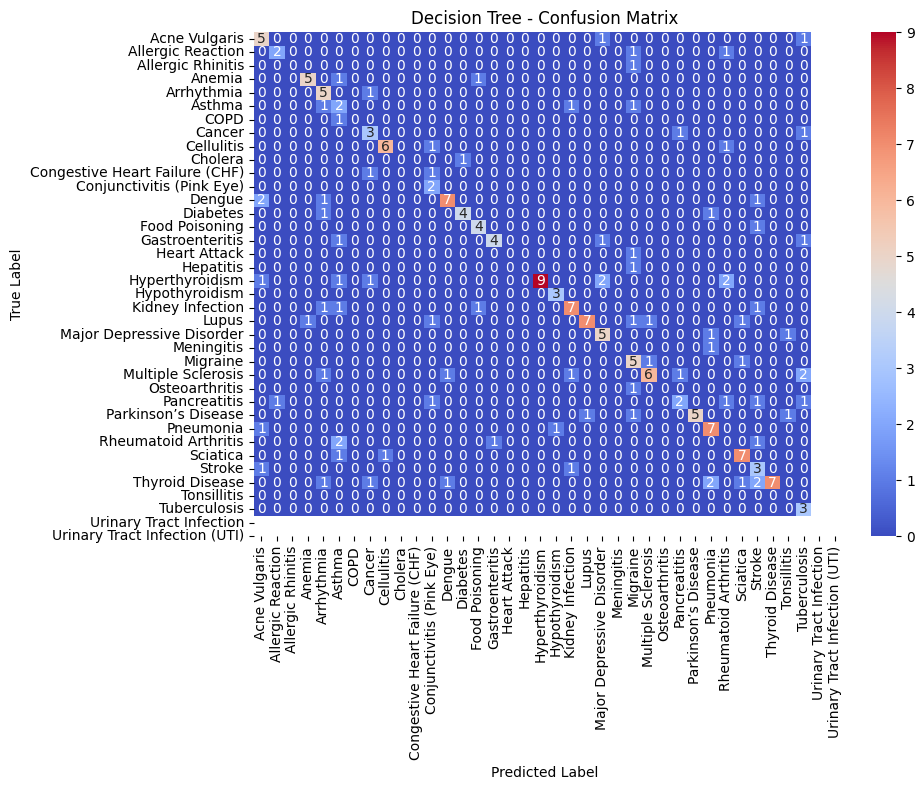

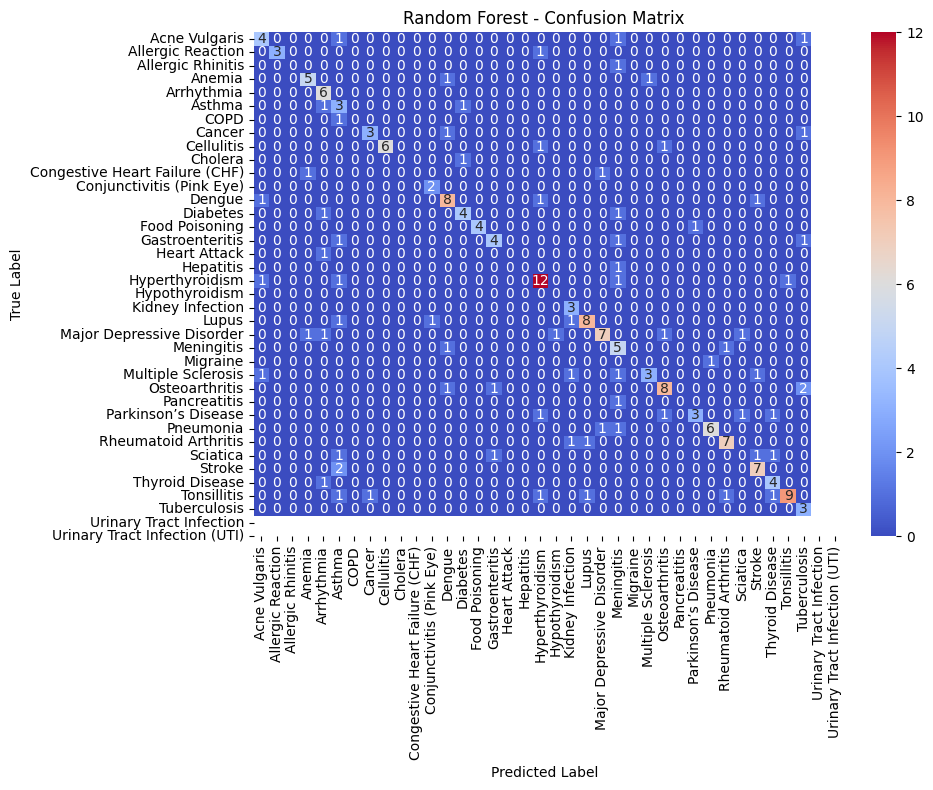

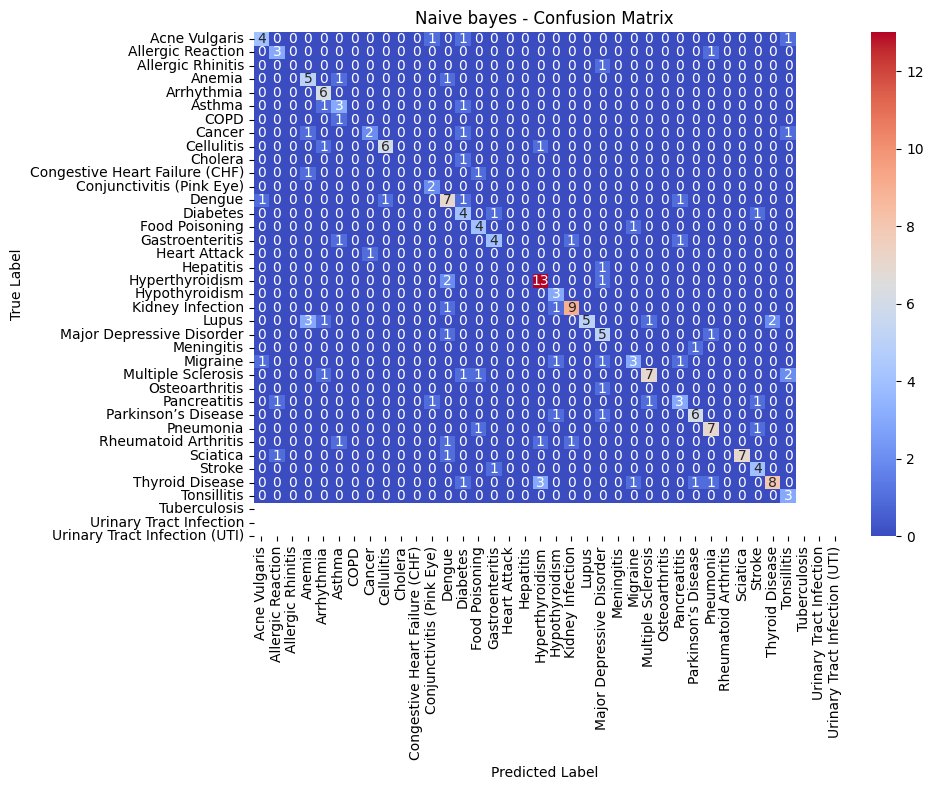

In [29]:
# 1. Plot Accuracy, Precision, Recall, F1 Score Comparison
metrics = {
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, dt_pred),
        "Precision": precision_score(y_test, dt_pred, average='weighted'),
        "Recall": recall_score(y_test, dt_pred, average='weighted'),
        "F1 Score": f1_score(y_test, dt_pred, average='weighted')
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred, average='weighted'),
        "Recall": recall_score(y_test, rf_pred, average='weighted'),
        "F1 Score": f1_score(y_test, rf_pred, average='weighted')
    },
    "Naive Bayes": {
        "Accuracy": accuracy_score(y_test, nb_pred),
        "Precision": precision_score(y_test, nb_pred, average='weighted'),
        "Recall": recall_score(y_test, nb_pred, average='weighted'),
        "F1 Score": f1_score(y_test, nb_pred, average='weighted')
    },
    "Majority Vote": {
        "Accuracy": accuracy_score(y_test, final_majority_vote),
        "Precision": precision_score(y_test, final_majority_vote, average='weighted'),
        "Recall": recall_score(y_test, final_majority_vote, average='weighted'),
        "F1 Score": f1_score(y_test, final_majority_vote, average='weighted')
    }
}

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics).T * 100  # Scale to percentage


# 2. Confusion Matrix Heatmap (For  Decision tree)
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
# 2. Confusion Matrix Heatmap (For Random Forest example)
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
# 2. Confusion Matrix Heatmap (For Naive bayes)
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Naive bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()






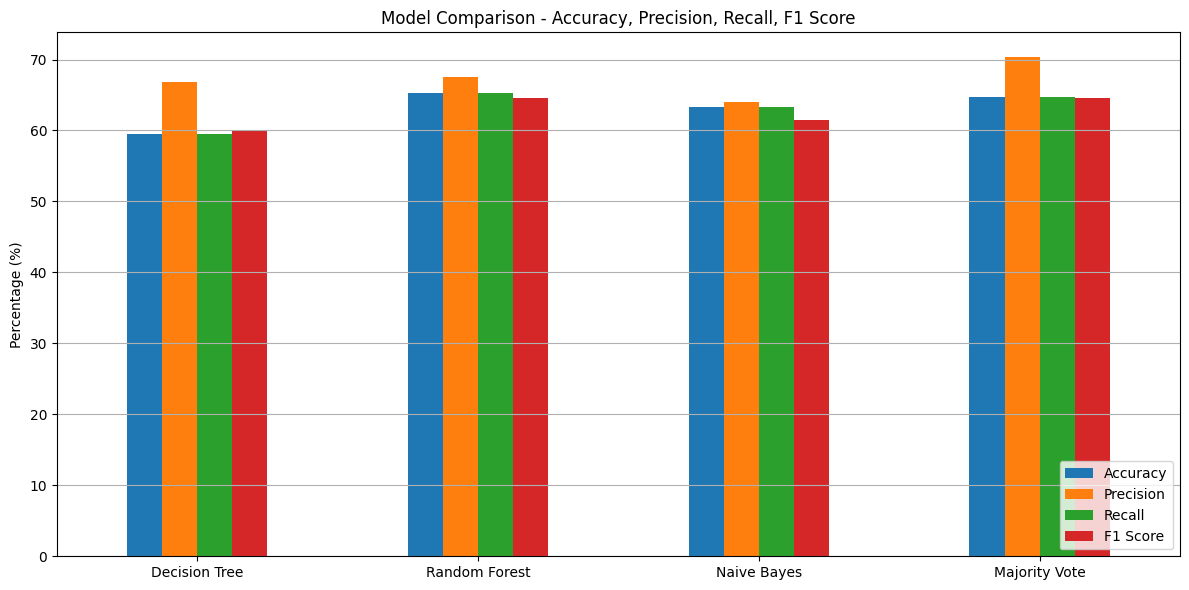

In [30]:

metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison - Accuracy, Precision, Recall, F1 Score")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Generating Pickle model

In [31]:
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(list(all_symptoms), 'all_symptoms_list.pkl')

['all_symptoms_list.pkl']

Example Trial

In [32]:
import numpy as np
from scipy.stats import mode

# Load the saved models and LabelEncoder
random_forest_model = joblib.load('random_forest_model.pkl')
naive_bayes_model = joblib.load('naive_bayes_model.pkl')
decision_tree_model = joblib.load('decision_tree_model.pkl')
le = joblib.load('label_encoder.pkl')
all_symptoms = joblib.load('all_symptoms_list.pkl')
# Function to predict disease based on user-selected symptoms
def predict_disease(chosen_symptoms, all_symptoms, X_columns):
    # Prepare the input vector for prediction
    input_vector = [1 if symptom in chosen_symptoms else 0 for symptom in X_columns]
    print(input_vector)
    # Predict using the loaded models
    rf_pred_new = random_forest_model.predict([input_vector])
    nb_pred_new = naive_bayes_model.predict([input_vector])
    dt_pred_new = decision_tree_model.predict([input_vector])

    # Combine predictions using majority voting
    new_final_predictions = np.array([rf_pred_new, nb_pred_new, dt_pred_new])
    new_final_majority_vote = mode(new_final_predictions, axis=0)[0].flatten()

    # Decode the predicted label back to the disease name
    final_disease = le.inverse_transform(new_final_majority_vote)
    return final_disease[0]

# user choose 3 symptoms
chosen_symptoms = ['Bladder discomfort','Foul smell of urine','Nausea']

# Prediction
predicted_disease = predict_disease(chosen_symptoms, all_symptoms, X.columns)
print(f"Predicted Disease: {predicted_disease}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Disease: Urinary Tract Infection (UTI)


C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\sondh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
